## References

My algorithm learning notebook following the live lesson series [**"Data Structures, Algorithms, and Machine Learning Optimization"**](https://learning.oreilly.com/videos/data-structures-algorithms/9780137644889/) by Dr. Jon Krohn. I adapted some and partially modified or added entirely new code. Notes largely based on and (some of them entirely) from Jon's notebooks and learning materials. The lesson and original notebook source code at:

https://learning.oreilly.com/videos/data-structures-algorithms/9780137644889/
https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/7-algos-and-data-structures.ipynb

# Searching & Sorting
- Not frequent in ML however:
  - Examplary to demo: 
    - Time complexity
    - Space complexity
    - Tyipcal time/space tradeoff
  - Helpful for ML pipelines:
    - Data Capture
    - Preprocessing
    - Training
    - Deployment

Exerpt from [Dr Krohn's notebook **7-algos-and-data-structures.ipynb**](https://colab.research.google.com/github/jonkrohn/ML-foundations/blob/master/notebooks/7-algos-and-data-structures.ipynb#scrollTo=d4tBvI88BheF)

# 4.4 Quick Sort
- `Pivot` point
- Start from the last and move the `pivot` in the array 
- The moving of the `pivot` occurs element by element.
    - All the values below the `pivot` are smaller than the `pivot`.
    - All the values above the `pivot` are greater than the `pivot`.

## Quick Sort Algorithm

In [ ]:
def quick_sort(array):
    _quick_sort(array, 0, len(array)-1) # to start, low is index of first element in array; high is penultimate
    return array

In [ ]:
def _quick_sort(array, low, high): 
    
    if low < high: # when low reaches high, we know all elements in array must be in order
        
        # Result of 2.: Element at "partitioning index" has been pivoted to its correct position
        p_index = partition(array, low, high) 
        
        # 3. Recursively sort the elements below the partitioning index...
        _quick_sort(array, low, p_index-1)
        # ...and, separately, above the partitioning index: 
        _quick_sort(array, p_index+1, high)
        
    return array

In [ ]:
def partition(array, low, high):
    
    # 1. Use the final element as the pivot:
    pivot = array[high]
    
    i = (low-1) # index of element on small side
    for j in range(low, high): # like a bubble swap, we compare pivot to all elements between low and high
        if array[j] < pivot: # if value < pivot, it's correctly on left so increment the smaller element's index...
            i = i+1
            array[i], array[j] = array[j], array[i] 
    array[i+1], array[high] = array[high], array[i+1] # ...otherwise, swap greater value to right of pivot (now what we want)
    return(i+1) # return index of correctly positioned pivot

In [ ]:
b = np.array([25, 2, 5, 14, 22, 11, 96, 1, 101])

In [ ]:
quick_sort(b)

array([  1,   2,   5,  11,  14,  22,  25,  96, 101])

In [ ]:
list_lengths = [10, 100, 1000, 10000, 100000, 1000000, 10000000]

In [ ]:
quick_times = []

for length in list_lengths:
    sample_list = random.sample(range(0, max(list_lengths)), length) # create a list of (length) samples ranging 0 - max().
    
    print("Quick sort {:,} items".format(length))
    start = time.process_time()
    x = quick_sort(sample_list)
    end = time.process_time()
    print(f"Runtime: {end - start} seconds")
    print(f"Sorted items: {x[:20]}\n")

    quick_times.append(end - start)

Quick sort 10 items
Runtime: 0.01987726000004386 seconds
Sorted items: [245625, 1320178, 2337453, 3730571, 5601013, 6485303, 6974068, 7927147, 9237285, 9816911]

Quick sort 100 items
Runtime: 0.0002373089999991862 seconds
Sorted items: [13024, 44515, 50453, 64871, 207633, 291821, 367844, 577949, 804230, 815025, 1044347, 1347411, 1456732, 1490716, 1855704, 1950889, 2021048, 2129953, 2156967, 2238109]

Quick sort 1,000 items
Runtime: 0.002667165000048044 seconds
Sorted items: [6392, 13165, 62263, 66011, 85475, 89465, 97354, 114584, 117836, 124166, 127854, 129660, 148242, 153674, 156739, 179643, 206299, 211749, 246282, 253742]

Quick sort 10,000 items
Runtime: 0.038440039999954934 seconds
Sorted items: [291, 606, 2782, 4069, 4175, 4617, 6646, 8249, 8590, 8603, 8797, 9408, 9726, 10088, 11854, 12728, 13250, 14004, 17362, 18475]

Quick sort 100,000 items
Runtime: 0.5208489070000724 seconds
Sorted items: [83, 318, 427, 428, 677, 889, 1043, 1246, 1655, 1687, 1730, 1832, 2045, 2077, 2165, 2251,

## Mathematical Explanation

**Average-case time**: The efficiency of quick sort comes from moving lower-valued pivots toward the front (ideally to the midpoint) of the array then "dividing and conquering" on either side of the pivot. In which case (the average case), quick sort behaves like a merge sort (thereby it has O($n$ log $n$) time complexity), but in a manner that requires only a single copy of the array in memory.

**Worst-case time**: With the pivot starting at the final element, if the array is already sorted, this is the worst case. There will be as many calls to `quick_sort()` as there are elements in the array (i.e., $n$ calls) and quick sort will perform a full round of bubble sorting (as per the `for j in range` loop) during each of those (i.e., $n-1$ comparisons); the product of these resulting in O($n^2$) time complexity. So, don't use quick sort if the array is nearly in order! 

**Best-case time**: If all values in the array are equal, quick sort will scan over them all once to confirm this, in which case it has O($n$) time complexity. The more values that are equal in the array, the closer to O($n$) performance will be.

Exerpt from [Dr Krohn's notebook **7-algos-and-data-structures.ipynb**](https://colab.research.google.com/github/jonkrohn/ML-foundations/blob/master/notebooks/7-algos-and-data-structures.ipynb#scrollTo=d4tBvI88BheF)

## Quick Sort Time Complexity

In [ ]:
quick_times_df = pd.DataFrame(list(zip(list_lengths[:6], quick_times)), columns=['n', 'time'])
quick_times_df

,n,time
0,10,0.019877
1,100,0.000237
2,1000,0.002667
3,10000,0.038440
4,100000,0.520849
5,1000000,6.369934


In [ ]:
quick_times_df.to_csv("/content/here/MyDrive/Data and Algorithms/ALGO04/quick_times_df.csv")

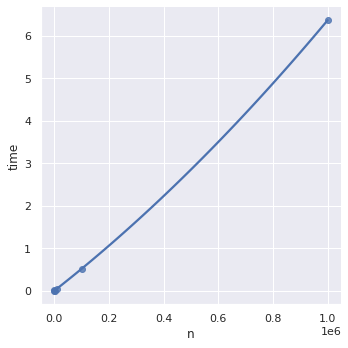

In [ ]:
sb.lmplot(x='n', y='time', data=quick_times_df, ci=None, order=2)

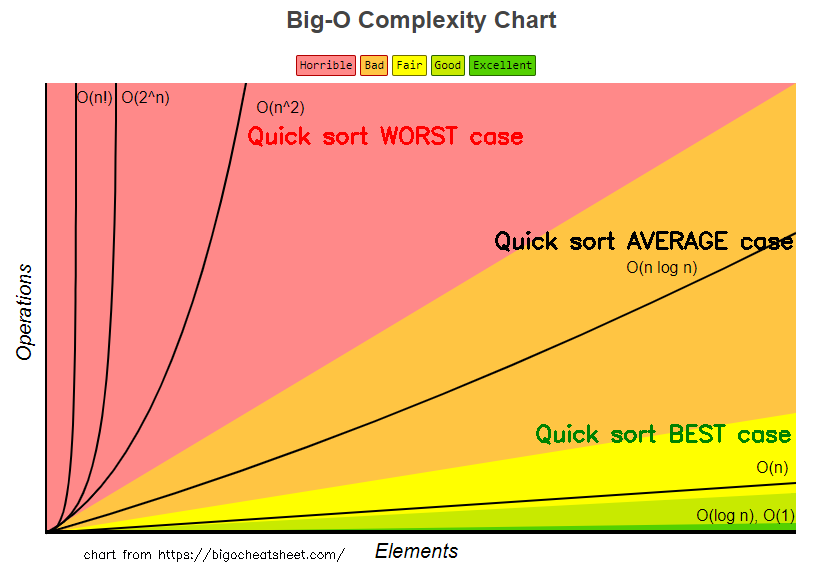

In [ ]:
big_o = get_img("/content/here/MyDrive/Data and Algorithms/big-O complexity chart.png", resize=1)
big_o = take_notes(big_o, "Quick sort WORST case", org=(0.3, 0.25), fontFace=cv2.FONT_HERSHEY_SIMPLEX, color=(0, 0, 255), thickness=2)
big_o = take_notes(big_o, "Quick sort AVERAGE case", org=(0.6, 0.435), fontFace=cv2.FONT_HERSHEY_SIMPLEX, color=(0, 0, 0), thickness=2)
big_o = take_notes(big_o, "Quick sort BEST case", org=(0.65, 0.775), fontFace=cv2.FONT_HERSHEY_SIMPLEX, color=(0, 130, 0), thickness=2)
big_o = cite_source(big_o, "chart from https://bigocheatsheet.com/", scale=0.4)
cv2_imshow(big_o)